**An√°lisis de datos Telecom X**

#Extraer datos#

In [168]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()

datos = pd.json_normalize(df, sep = '_')
datos.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#Transformar datos#

In [169]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [170]:
# Conteo de valores nulos por columna
datos.isnull().sum()


customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

In [171]:
# Verificar filas duplicadas
duplicados = datos.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0


In [172]:
# Revisi√≥n de tipos de datos
datos.dtypes

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object

In [173]:
# Ver algunas filas para detectar posibles problemas visualmente
datos.sample(5)

customerID Churn customer_gender  customer_SeniorCitizen  \
6148  8409-WQJUX    No          Female                       0   
1662  2360-RDGRO    No            Male                       0   
2127  2984-RGEYA    No          Female                       0   
2546  3551-HUAZH   Yes            Male                       1   
1849  2632-UCGVD   Yes            Male                       1   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
6148               No                  No               25                 No   
1662              Yes                  No               65                Yes   
2127              Yes                 Yes               69                Yes   
2546               No                  No                1                Yes   
1849              Yes                  No               66                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
6148    No phone service                      DSL  ...                    No   
1662                 Yes              Fiber optic  ...                    No   
2127                  No                       No  ...   No internet service   
2546                 Yes              Fiber optic  ...                    No   
1849                 Yes              Fiber optic  ...                    No   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
6148                       Yes                  Yes                  Yes   
1662                       Yes                   No                  Yes   
2127       No internet service  No internet service  No internet service   
2546                        No                   No                   No   
1849                        No                  Yes                  Yes   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
6148                      Yes         One year                       No   
1662                      Yes   Month-to-month                      Yes   
2127      No internet service         Two year                       No   
2546                       No   Month-to-month                      Yes   
1849                      Yes   Month-to-month                      Yes   

          account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
6148           Electronic check                   54.20                1423.15  
1662           Electronic check                  104.25                6812.95  
2127  Bank transfer (automatic)                   19.75                 1375.4  
2546           Electronic check                   74.40                   74.4  
1849    Credit card (automatic)                  100.05                 6871.9  

[5 rows x 21 columns]

In [174]:
datos.tail()

customerID Churn customer_gender  customer_SeniorCitizen  \
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
7262                       No         One year                       No   
7263                      Yes   Month-to-month                      Yes   
7264                       No   Month-to-month                      Yes   
7265                      Yes         Two year                       No   
7266                      Yes         Two year                       No   

     account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
7262          Mailed check                   55.15                  742.9  
7263      Electronic check                   85.10                 1873.7  
7264          Mailed check                   50.30                  92.75  
7265          Mailed check                   67.85                4627.65  
7266      Electronic check                   59.00                 3707.6  

[5 rows x 21 columns]

In [175]:
datos.shape

(7267, 21)

In [176]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [177]:
print(datos.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


Transformar datos booleanos en 1 y 0

1: True
0: False

In [178]:
columns_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in columns_yes_no:
    print(f"Valores √∫nicos en {col}: {datos[col].unique()}")


Valores √∫nicos en Churn: ['No' 'Yes' '']
Valores √∫nicos en customer_Partner: ['Yes' 'No']
Valores √∫nicos en customer_Dependents: ['Yes' 'No']
Valores √∫nicos en phone_PhoneService: ['Yes' 'No']
Valores √∫nicos en phone_MultipleLines: ['No' 'Yes' 'No phone service']
Valores √∫nicos en internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores √∫nicos en internet_OnlineBackup: ['Yes' 'No' 'No internet service']
Valores √∫nicos en internet_DeviceProtection: ['No' 'Yes' 'No internet service']
Valores √∫nicos en internet_TechSupport: ['Yes' 'No' 'No internet service']
Valores √∫nicos en internet_StreamingTV: ['Yes' 'No' 'No internet service']
Valores √∫nicos en internet_StreamingMovies: ['No' 'Yes' 'No internet service']
Valores √∫nicos en account_PaperlessBilling: ['Yes' 'No']


In [179]:
columns_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in columns_yes_no:
    if col == 'Churn':
        datos[col] = datos[col].map({'Yes': 1, 'No': 0, '': np.nan})
    else:
        datos[col] = [1 if x == 'Yes' else (0 if x == 'No' else x) for x in datos[col]]

# Verificaci√≥n
for col in columns_yes_no:
    print(f"{col}: {datos[col].unique()}")


Churn: [ 0.  1. nan]
customer_Partner: [1 0]
customer_Dependents: [1 0]
phone_PhoneService: [1 0]
phone_MultipleLines: [0 1 'No phone service']
internet_OnlineSecurity: [0 1 'No internet service']
internet_OnlineBackup: [1 0 'No internet service']
internet_DeviceProtection: [0 1 'No internet service']
internet_TechSupport: [1 0 'No internet service']
internet_StreamingTV: [1 0 'No internet service']
internet_StreamingMovies: [0 1 'No internet service']
account_PaperlessBilling: [1 0]


In [180]:
datos.head()

customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO    0.0          Female                       0   
1  0003-MKNFE    0.0            Male                       0   
2  0004-TLHLJ    1.0            Male                       0   
3  0011-IGKFF    1.0            Male                       1   
4  0013-EXCHZ    1.0          Female                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                   0                      DSL  ...                     1   
1                   1                      DSL  ...                     0   
2                   0              Fiber optic  ...                     0   
3                   0              Fiber optic  ...                     1   
4                   0              Fiber optic  ...                     0   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                         0                    1                    1   
1                         0                    0                    0   
2                         1                    0                    0   
3                         1                    0                    1   
4                         0                    1                    1   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                        0         One year                        1   
1                        1   Month-to-month                        0   
2                        0   Month-to-month                        1   
3                        1   Month-to-month                        1   
4                        0   Month-to-month                        1   

   account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0           Mailed check                    65.6                  593.3  
1           Mailed check                    59.9                  542.4  
2       Electronic check                    73.9                 280.85  
3       Electronic check                    98.0                1237.85  
4           Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [181]:
datos.dtypes

customerID                    object
Churn                        float64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64
customer_tenure                int64
phone_PhoneService             int64
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling       int64
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object

In [182]:
# cambiar object a float
datos['account_Charges_Total'] = pd.to_numeric(datos['account_Charges_Total'], errors='coerce')


In [183]:
datos.dtypes

customerID                    object
Churn                        float64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64
customer_tenure                int64
phone_PhoneService             int64
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling       int64
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total        float64
dtype: object

In [184]:
# Crear columna de cuentas diarias
datos["Cuentas_Diarias"] = (datos["account_Charges_Monthly"] / 30).round(3)


In [185]:
(datos["Cuentas_Diarias"].dtype)


dtype('float64')

In [186]:
datos.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Evasi√≥n",
    "customer_gender": "G√©nero",
    "customer_SeniorCitizen": "Adulto_Mayor",
    "customer_Partner": "Tiene_Pareja",
    "customer_Dependents": "Tiene_Dependientes",
    "customer_tenure": "Meses_Conectado",
    "phone_PhoneService": "Servicio_Tel√©fono",
    "phone_MultipleLines": "L√≠neas_M√∫ltiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_En_L√≠nea",
    "internet_OnlineBackup": "Respaldo_En_L√≠nea",
    "internet_DeviceProtection": "Protecci√≥n_Dispositivo",
    "internet_TechSupport": "Soporte_T√©cnico",
    "internet_StreamingTV": "TV_Streaming",
    "internet_StreamingMovies": "Pel√≠culas_Streaming",
    "account_Contract": "Tipo_Contrato",
    "account_PaperlessBilling": "Factura_Electr√≥nica",
    "account_PaymentMethod": "M√©todo_Pago",
    "account_Charges_Monthly": "Cargos_Mensuales",
    "account_Charges_Total": "Cargos_Totales",
    "Cuentas_Diarias": "Cargos_Diarios"
}, inplace=True)

#Visualizar datos#

In [187]:
# Centrar datos para evitar confusiones y mejorar la visibilidad
datos.head().style.set_properties(**{'text-align': 'center'})


In [188]:
# exportamos a JSON el Dataframe

datos.to_json("datos_final.json", orient="records", lines=True)

#An√°lisis Descriptivo

In [189]:
datos.describe()

Evasi√≥n  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
count  7043.000000   7267.000000   7267.000000         7267.000000   
mean      0.265370      0.162653      0.484106            0.300124   
std       0.441561      0.369074      0.499782            0.458343   
min       0.000000      0.000000      0.000000            0.000000   
25%       0.000000      0.000000      0.000000            0.000000   
50%       0.000000      0.000000      0.000000            0.000000   
75%       1.000000      0.000000      1.000000            1.000000   
max       1.000000      1.000000      1.000000            1.000000   

       Meses_Conectado  Servicio_Tel√©fono  Factura_Electr√≥nica  \
count      7267.000000        7267.000000          7267.000000   
mean         32.346498           0.902711             0.593230   
std          24.571773           0.296371             0.491265   
min           0.000000           0.000000             0.000000   
25%           9.000000           1.000000             0.000000   
50%          29.000000           1.000000             1.000000   
75%          55.000000           1.000000             1.000000   
max          72.000000           1.000000             1.000000   

       Cargos_Mensuales  Cargos_Totales  Cargos_Diarios  
count       7267.000000     7256.000000     7267.000000  
mean          64.720098     2280.634213        2.157341  
std           30.129572     2268.632997        1.004322  
min           18.250000       18.800000        0.608000  
25%           35.425000      400.225000        1.181000  
50%           70.300000     1391.000000        2.343000  
75%           89.875000     3785.300000        2.996000  
max          118.750000     8684.800000        3.958000

In [190]:
descripcion = datos.describe().rename(index={
    "count": "Conteo",
    "mean": "Media",
    "std": "Desviaci√≥n_Estandar",
    "min": "M√≠nimo",
    "25%": "Primer_Cuartil 25%",
    "50%": "Mediana 50%",
    "75%": "Tercer_Cuartil 75%",
    "max": "M√°ximo"
})


In [191]:
descripcion

Evasi√≥n  Adulto_Mayor  Tiene_Pareja  \
Conteo               7043.000000   7267.000000   7267.000000   
Media                   0.265370      0.162653      0.484106   
Desviaci√≥n_Estandar     0.441561      0.369074      0.499782   
M√≠nimo                  0.000000      0.000000      0.000000   
Primer_Cuartil 25%      0.000000      0.000000      0.000000   
Mediana 50%             0.000000      0.000000      0.000000   
Tercer_Cuartil 75%      1.000000      0.000000      1.000000   
M√°ximo                  1.000000      1.000000      1.000000   

                     Tiene_Dependientes  Meses_Conectado  Servicio_Tel√©fono  \
Conteo                      7267.000000      7267.000000        7267.000000   
Media                          0.300124        32.346498           0.902711   
Desviaci√≥n_Estandar            0.458343        24.571773           0.296371   
M√≠nimo                         0.000000         0.000000           0.000000   
Primer_Cuartil 25%             0.000000         9.000000           1.000000   
Mediana 50%                    0.000000        29.000000           1.000000   
Tercer_Cuartil 75%             1.000000        55.000000           1.000000   
M√°ximo                         1.000000        72.000000           1.000000   

                     Factura_Electr√≥nica  Cargos_Mensuales  Cargos_Totales  \
Conteo                       7267.000000       7267.000000     7256.000000   
Media                           0.593230         64.720098     2280.634213   
Desviaci√≥n_Estandar             0.491265         30.129572     2268.632997   
M√≠nimo                          0.000000         18.250000       18.800000   
Primer_Cuartil 25%              0.000000         35.425000      400.225000   
Mediana 50%                     1.000000         70.300000     1391.000000   
Tercer_Cuartil 75%              1.000000         89.875000     3785.300000   
M√°ximo                          1.000000        118.750000     8684.800000   

                     Cargos_Diarios  
Conteo                  7267.000000  
Media                      2.157341  
Desviaci√≥n_Estandar        1.004322  
M√≠nimo                     0.608000  
Primer_Cuartil 25%         1.181000  
Mediana 50%                2.343000  
Tercer_Cuartil 75%         2.996000  
M√°ximo                     3.958000

##An√°lisis Visuales##

In [202]:
# Hago copia para ver la columna evasi√≥n
df_clean = datos.dropna(subset=['Evasi√≥n']).copy()

# Variable 1
df_clean['Estado'] = df_clean['Evasi√≥n'].map({
    0.0: 'Activo',
    1.0: 'Baja'
}).astype('category')

df_summary = df_clean['Estado'].value_counts().reset_index()
df_summary.columns = ['Estado', 'Clientes']
df_summary['Porcentaje'] = (df_summary['Clientes'] / df_summary['Clientes'].sum() * 100).round(1)

In [236]:
# Recuento de evasi√≥n

import plotly.express as px
import plotly.graph_objects as go

# Nuevo esquema de colores
colores = {
    'Activo': '#00BFC4',
    'Baja': '#F8766D'
}

# Gr√°fico circular
fig = px.pie(
    df_summary,
    names='Estado',
    values='Clientes',
    color='Estado',
    color_discrete_map=colores,
    hole=0.4,
    title='Distribuci√≥n del estado de Clientes'
)

# Porcentaje como texto visible
fig.update_traces(
    textinfo='percent+label',
    textfont_size=14,
    pull=[0.03, 0],
    marker=dict(line=dict(color='white', width=2))
)

# Estad√≠sticas a la derecha
fig.add_annotation(
    text=(
        "<b>ESTAD√çSTICAS</b><br>"
        f"üü¶ Activos: {df_summary[df_summary['Estado']=='Activo']['Clientes'].values[0]}<br>"
        f"üü• Bajas: {df_summary[df_summary['Estado']=='Baja']['Clientes'].values[0]}<br>"
        f"üë• Total: {df_summary['Clientes'].sum()}"
    ),
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=1,
    y=0.9,
    bordercolor='gray',
    borderwidth=1,
    bgcolor='white',
    font=dict(size=14)
)

# Ajustes finales
fig.update_layout(
    font=dict(family="Arial"),
    margin=dict(l=50, r=150, t=50, b=50),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='center',
        x=0.5
    )
)

fig.show()


Categor√≠as

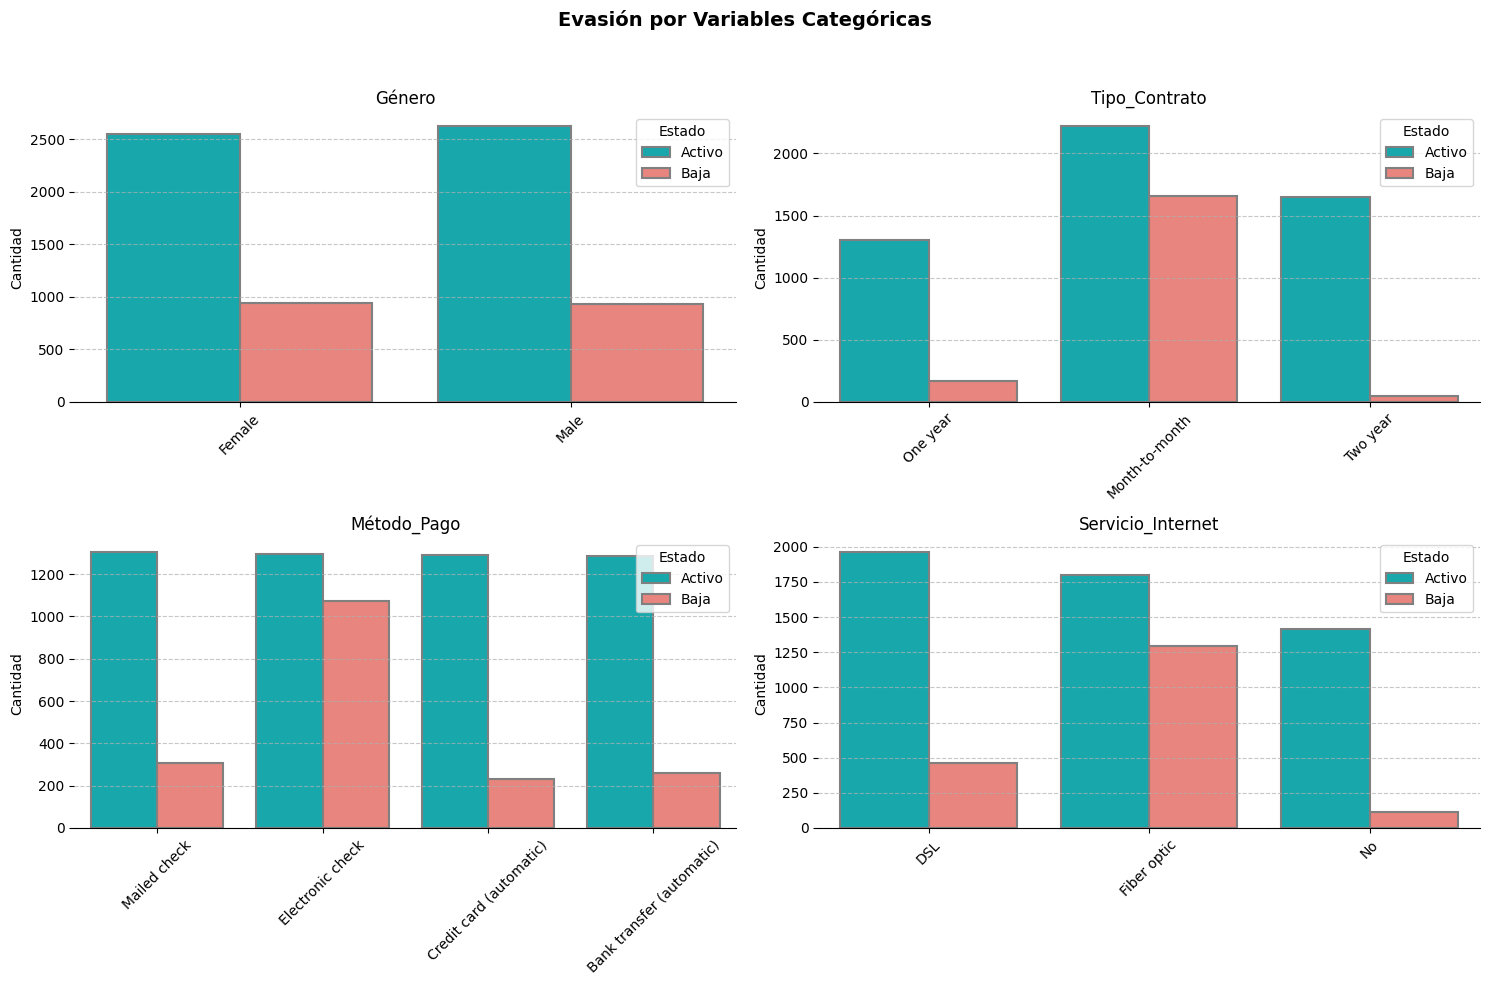

In [237]:
import seaborn as sns

# Variables
variables = ['G√©nero', 'Tipo_Contrato', 'M√©todo_Pago', 'Servicio_Internet']

# Colores
colores_plotly = {'Activo': '#00BFC4', 'Baja': '#F8766D'}

# figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evasi√≥n por Variables Categ√≥ricas', fontsize=14, fontweight='bold')

# Reorganizar los ejes
axes = axes.flatten()

# graficos
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(
        data=df_clean,
        x=var,
        hue='Estado',
        palette=colores_plotly,
        ax=ax,
        edgecolor='gray',
        linewidth=1.5
    )
    ax.set_title(f'{var}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=45)

    # Estilo
    ax.set_facecolor('white')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Correlaci√≥n entre variables#

Matriz de correlaci√≥n:
                      Evasi√≥n  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
Evasi√≥n              1.000000      0.150889     -0.150448           -0.164221   
Adulto_Mayor         0.150889      1.000000      0.022970           -0.212952   
Tiene_Pareja        -0.150448      0.022970      1.000000            0.448900   
Tiene_Dependientes  -0.164221     -0.212952      0.448900            1.000000   
Meses_Conectado     -0.352229      0.018187      0.377551            0.159892   
Servicio_Tel√©fono    0.011942      0.010060      0.018828           -0.003863   
Factura_Electr√≥nica  0.191825      0.157734     -0.011201           -0.111752   
Cargos_Mensuales     0.193356      0.220388      0.097122           -0.115832   
Cargos_Totales      -0.199484      0.103499      0.316918            0.063960   
Cargos_Diarios       0.193355      0.220386      0.097127           -0.115826   

                     Meses_Conectado  Servicio_Tel√©fono  Factura_Electr√≥nica  

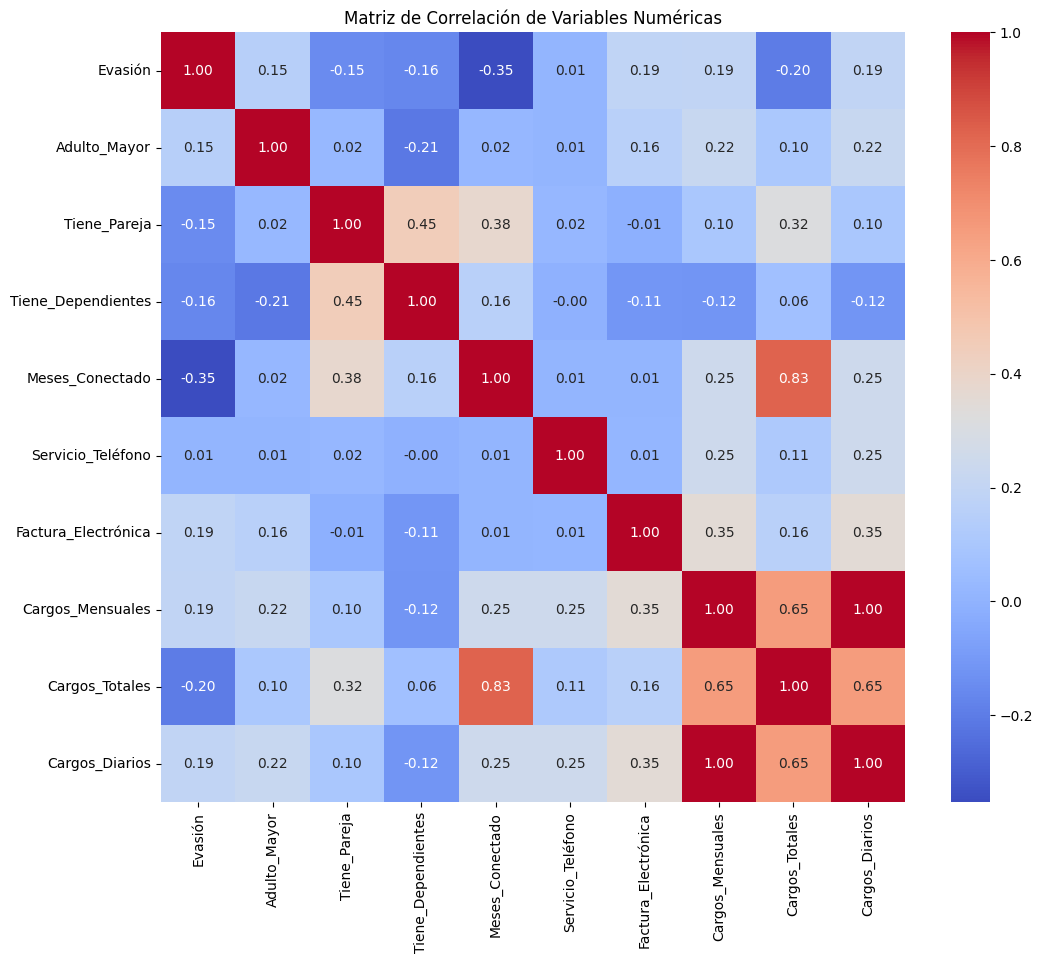

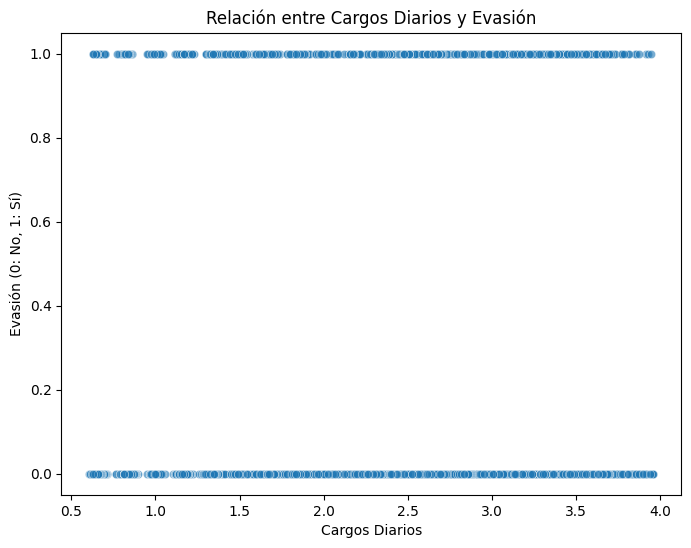

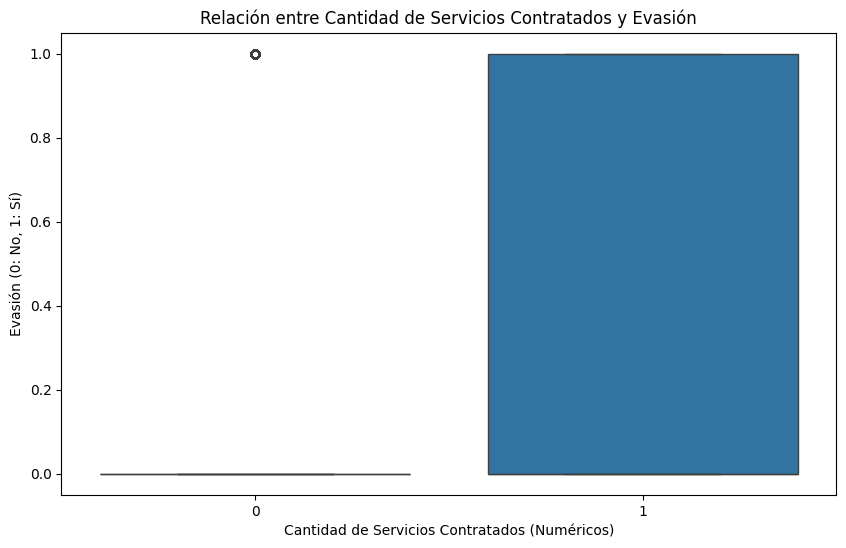

<ipython-input-239-b26146f5f788>:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




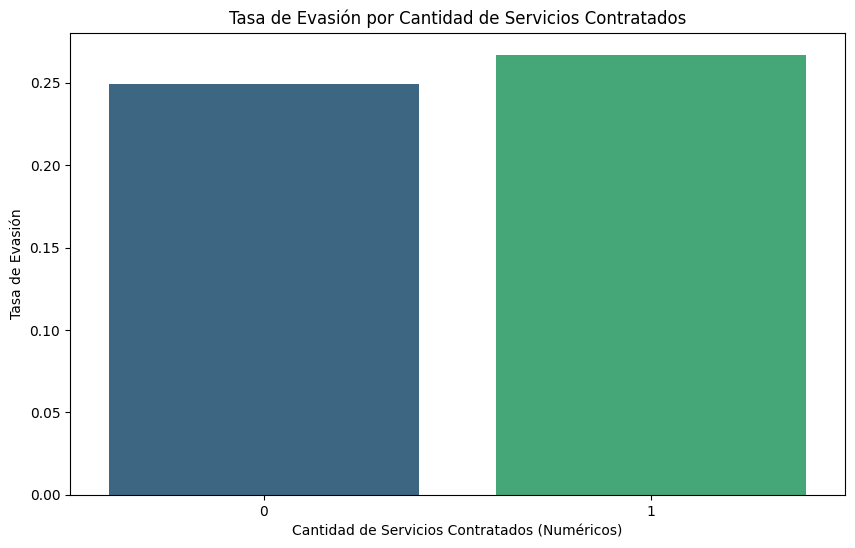

In [239]:
# Identificar variables num√©ricas
variables_numericas = datos.select_dtypes(include=[np.number]).columns.tolist()

# Calcular la matriz de correlaci√≥n
correlacion = datos[variables_numericas].corr()

# Mostrar la matriz de correlaci√≥n
print("Matriz de correlaci√≥n:")
print(correlacion)

# Visualizar la matriz de correlaci√≥n con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas')
plt.show()

# Explorar la relaci√≥n entre cargos diarios y evasi√≥n con un gr√°fico de dispersi√≥n
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos, x='Cargos_Diarios', y='Evasi√≥n', alpha=0.6)
plt.title('Relaci√≥n entre Cargos Diarios y Evasi√≥n')
plt.xlabel('Cargos Diarios')
plt.ylabel('Evasi√≥n (0: No, 1: S√≠)')
plt.show()

# Para analizar c√≥mo la cantidad de servicios contratados afecta la evasi√≥n,
# primero necesitamos crear una columna que represente la cantidad de servicios.
# Asumimos que las columnas relacionadas con servicios son las siguientes (ajusta si es necesario):
columnas_servicio = [
    'Servicio_Tel√©fono',
    'L√≠neas_M√∫ltiples',
    'Servicio_Internet', # Esta es categ√≥rica, debemos manejarla
    'Seguridad_En_L√≠nea',
    'Respaldo_En_L√≠nea',
    'Protecci√≥n_Dispositivo',
    'Soporte_T√©cnico',
    'TV_Streaming',
    'Pel√≠culas_Streaming'
]

# Creamos una copia del dataframe para no modificar el original en este paso
df_servicios = datos.copy()

# Convertir las columnas categ√≥ricas de servicio a num√©ricas si no lo est√°n ya
# En tu c√≥digo ya convertiste algunas a 0 y 1. Asegur√©monos de que las usadas aqu√≠ sean num√©ricas.
# La columna 'Servicio_Internet' es categ√≥rica, la excluimos de la suma directa
columnas_servicio_numericas = [col for col in columnas_servicio if col in df_servicios.select_dtypes(include=np.number).columns]

df_servicios['Cantidad_Servicios'] = df_servicios[columnas_servicio_numericas].sum(axis=1)

# Explorar la relaci√≥n entre la cantidad de servicios y la evasi√≥n
# Como Cantidad_Servicios ser√° discreta, un boxplot o un gr√°fico de barras agrupado puede ser √∫til
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_servicios, x='Cantidad_Servicios', y='Evasi√≥n')
plt.title('Relaci√≥n entre Cantidad de Servicios Contratados y Evasi√≥n')
plt.xlabel('Cantidad de Servicios Contratados (Num√©ricos)')
plt.ylabel('Evasi√≥n (0: No, 1: S√≠)')
plt.show()

# Tambi√©n puedes agrupar por cantidad de servicios y calcular la tasa de evasi√≥n
tasa_evasion_por_servicios = df_servicios.groupby('Cantidad_Servicios')['Evasi√≥n'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=tasa_evasion_por_servicios, x='Cantidad_Servicios', y='Evasi√≥n', palette='viridis')
plt.title('Tasa de Evasi√≥n por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados (Num√©ricos)')
plt.ylabel('Tasa de Evasi√≥n')
plt.show()

In [241]:
# Claves Numericas
variables_numericas = ['Cargos_Mensuales', 'Cargos_Totales', 'Meses_Conectado']

# Crear un gr√°fico por cada variable
for var in variables_numericas:
    fig = px.box(
        df_clean,
        x='Estado',
        y=var,
        color='Estado',
        color_discrete_map={'Activo': '#00BFC4', 'Baja': '#F8766D'},
        points='all',
        title=f'Distribuci√≥n de {var} por Estado'
    )

    fig.update_traces(jitter=0.3, marker_opacity=0.4)
    fig.update_layout(
        font=dict(family="Fira Code", size=14),
        yaxis_title=var,
        xaxis_title="Estado",
        boxmode='group',
        showlegend=False
    )
    fig.show()


#**Informe Final del An√°lisis de Evasi√≥n de Clientes Telecom X**#




# ‚ú¶ Introducci√≥n

La **evasi√≥n de clientes**, conocida tambi√©n como *Churn* simboliza un gran desaf√≠o para las empresas de servicios, especialmente en sectores competitivos como las telecomunicaciones. La p√©rdida de clientes no solo impica la disminuci√≥n de ingresos, sino tambi√©n costos asociados a la adquisici√≥n de nuevos suscriptores. El presente an√°lisis posee como objetivo identificar y comprender los factores claves que influyen en la decisi√≥n de los clientes de cancelar su servicio, utilizando t√©cnicas de an√°lisis exploratorios de datos (EDA), buscaremos descubrir patrones y relaciones en los datos que puedan arrojar luz sobre las razones detr√°s de la evasi√≥n y, en √∫ltima instancia, ayudar a desarrollar estrategias para retener a los clientes.

# ‚ú¶ Limpieza y Tratamiento de Datos

El proceso de an√°lisis empiez√° extrayendo los datos desde un archivo JSON remoto para posteriormente preparar el dataset para el an√°lisis. Los pasos clave incluyeron:

- **Carga y Normalizaci√≥n:** Los datos fueron cargados desde la URL proporcionada y normalizados para crear una estructura tabular manejable con Pandas.

- **Inspecci√≥n Inicial:** Se revisaron las primeras y √∫ltimas filas, la informaci√≥n general (`.info()`), la presencia de valores nulos (`.isnull().sum()`) y filas duplicadas (`.duplicated().sum()`) para obtener una visi√≥n inicial de la calidad de los datos.

- **Revisi√≥n de Tipos de Datos:** Se examinaron los tipos de datos de cada columna (`.dtypes`) para identificar posibles inconsistencias.

- **Transformaci√≥n de Variables Booleanas:** Las columnas que representaban valores booleanos ('Yes'/'No') fueron transformadas a un formato num√©rico (1 para 'Yes', 0 para 'No') para facilitar el an√°lisis cuantitativo. Se manejaron los valores faltantes o inconsistentes durante esta transformaci√≥n.

- **Conversi√≥n de Tipos Espec√≠ficos:** Se identific√≥ que la columna de 'Cargos_Totales' estaba como tipo 'object' debido a la presencia de posibles valores no num√©ricos (como cadenas vac√≠as). Se convirti√≥ a tipo num√©rico utilizando `pd.to_numeric` con `errors='coerce'` para convertir los valores problem√°ticos a `NaN`.

- **Creaci√≥n de Nueva Variable:** Se calcul√≥ una nueva variable, 'Cuentas_Diarias' (Cargos Diarios), dividiendo los cargos mensuales por 30 y redondeando a tres decimales. Esto proporcion√≥ una m√©trica de costo m√°s granular.

- **Renombrado de Columnas:** Se renombraron las columnas para mejorar la legibilidad y comprensi√≥n de los datos en espa√±ol.

- **Manejo de Valores Faltantes en 'Evasi√≥n':** Para los an√°lisis que involucran la variable 'Evasi√≥n', se cre√≥ una copia del DataFrame (`df_clean`) donde se eliminaron las filas con valores nulos en esta columna, asegurando la integridad del an√°lisis de evasi√≥n.

# ‚ú¶ An√°lisis Exploratorio de Datos (EDA)

El an√°lisis exploratorio de datos se centr√≥ en visualizar la distribuci√≥n de la variable objetivo (Evasi√≥n) y explorar las relaciones entre la evasi√≥n y otras caracter√≠sticas de los clientes y sus servicios.

- **Distribuci√≥n de la Evasi√≥n:** Un gr√°fico circular mostr√≥ la proporci√≥n de clientes que han evadido el servicio frente a los que permanecen activos. Esto proporcion√≥ una base para entender la magnitud del problema del Churn.

- **Evasi√≥n por Variables Categ√≥ricas:** Se utilizaron gr√°ficos de barras agrupados para visualizar la distribuci√≥n de la evasi√≥n en funci√≥n de variables categ√≥ricas clave como 'G√©nero', 'Tipo_Contrato', 'M√©todo_Pago' y 'Servicio_Internet'. Estos gr√°ficos permitieron identificar qu√© categor√≠as dentro de estas variables presentan mayores tasas de evasi√≥n. Por ejemplo, se observ√≥ si ciertos tipos de contrato o m√©todos de pago est√°n m√°s asociados con la baja de clientes.

- **An√°lisis Descriptivo de Variables Num√©ricas:** Se calcul√≥ y present√≥ un resumen estad√≠stico descriptivo de las variables num√©ricas (Conteo, Media, Desviaci√≥n Est√°ndar, M√≠nimo, Cuartiles, M√°ximo), renombr√°ndolo para mayor claridad. Esto proporcion√≥ una comprensi√≥n cuantitativa de la distribuci√≥n de estas variables.

- **Correlaci√≥n entre Variables Num√©ricas:** Se calcul√≥ y visualiz√≥ una matriz de correlaci√≥n entre todas las variables num√©ricas del dataset. Este mapa de calor permiti√≥ identificar la fuerza y direcci√≥n de las relaciones lineales entre pares de variables, incluyendo la correlaci√≥n con la variable 'Evasi√≥n'.

- **Relaci√≥n entre Cargos Diarios y Evasi√≥n:** Un gr√°fico de dispersi√≥n explor√≥ visualmente la relaci√≥n entre los cargos diarios y la evasi√≥n.

- **Relaci√≥n entre Cantidad de Servicios y Evasi√≥n:** Para investigar si la cantidad de servicios contratados influye en la evasi√≥n, se cre√≥ una variable que suma los servicios num√©ricos. Se utilizaron boxplots para comparar la distribuci√≥n de la cantidad de servicios entre clientes activos y los que evadieron, y un gr√°fico de barras para visualizar la tasa de evasi√≥n promedio por cantidad de servicios.

Estos an√°lisis visuales y cuantitativos son fundamentales para identificar patrones y caracter√≠sticas de los clientes que tienden a evadir el servicio.

# ‚ú¶ Conclusi√≥n

A partir del an√°lisis exploratorio de datos, se pueden extraer varias conclusiones clave:

- **Tasas de Evasi√≥n:** El gr√°fico circular revel√≥ la proporci√≥n actual de clientes que han evadido, proporcionando una m√©trica clara del problema a abordar.

- **Impacto de Variables Categ√≥ricas:** Los gr√°ficos de barras por categor√≠a probablemente se√±alaron que ciertos grupos de clientes (por ejemplo, aquellos con un tipo de contrato espec√≠fico, m√©todo de pago o servicio de internet) tienen una tasa de evasi√≥n notablemente mayor. Estos segmentos representan √°reas de enfoque prioritario para las estrategias de retenci√≥n.

- **Correlaciones Relevantes:** La matriz de correlaci√≥n y los gr√°ficos de dispersi√≥n/boxplot para variables num√©ricas ayudaron a identificar qu√© caracter√≠sticas num√©ricas (como los cargos mensuales o la tenencia) est√°n m√°s fuertemente correlacionadas con la evasi√≥n. Por ejemplo, una alta correlaci√≥n positiva entre "Cargos_Mensuales" y "Evasi√≥n" sugerir√≠a que los clientes con facturas m√°s altas son m√°s propensos a irse. La exploraci√≥n de la relaci√≥n entre "Cargos_Diarios" y "Cantidad_Servicios" con la evasi√≥n proporcion√≥ insights adicionales sobre c√≥mo el costo y la amplitud de los servicios afectan la decisi√≥n del cliente.

Los insights obtenidos de este an√°lisis visual y cuantitativo son cruciales para comprender el perfil del cliente que evade y los factores que contribuyen a esta decisi√≥n. Esta informaci√≥n puede ser utilizada para segmentar a los clientes en riesgo y dise√±ar intervenciones dirigidas.

# ‚ú¶ Recomendaciones

Basado en los hallazgos de este an√°lisis, se sugieren las siguientes recomendaciones estrat√©gicas para reducir la evasi√≥n de clientes:

- **Segmentaci√≥n de Clientes en Riesgo:** Utilizar las caracter√≠sticas identificadas (como tipo de contrato, m√©todo de pago, servicio de internet y potencialmente los cargos mensuales/diarios) para crear modelos que predigan qu√© clientes tienen una alta probabilidad de evadir.

- **Estrategias de Retenci√≥n Dirigidas:** Implementar programas de retenci√≥n espec√≠ficos para los segmentos de clientes identificados como de alto riesgo. Esto podr√≠a incluir ofertas personalizadas, mejoras en el servicio al cliente, o comunicaciones proactivas para abordar sus preocupaciones.

- **Optimizaci√≥n de la Oferta de Servicios:** Analizar si la cantidad de servicios contratados o los cargos asociados est√°n contribuyendo a la evasi√≥n. Considerar la posibilidad de ofrecer paquetes de servicios m√°s atractivos o ajustar las estructuras de precios para segmentos vulnerables.

- **Mejora en la Experiencia del Cliente:** Si el an√°lisis sugiere que ciertos m√©todos de pago o tipos de contrato est√°n asociados con una mayor evasi√≥n, investigar las razones subyacentes. Podr√≠a ser necesario mejorar la facilidad de uso de ciertos m√©todos de pago o la claridad de los t√©rminos del contrato.

- **Monitoreo Continuo:** Establecer un sistema para monitorear continuamente las m√©tricas de evasi√≥n y los factores que la influyen. El an√°lisis de datos debe ser un proceso iterativo que permita ajustar las estrategias de retenci√≥n a medida que cambian las din√°micas del mercado y el comportamiento del cliente.

La implementaci√≥n de estas recomendaciones, respaldada por un an√°lisis de datos s√≥lido, puede ayudar a Telecom X a reducir su tasa de evasi√≥n y mejorar la rentabilidad a largo plazo.